In [ ]:
pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.3 MB 44 kB/s 
     |████████████████████████████████| 199 kB 54.4 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.0-py2.py3-none-any.whl size=281764026 sha256=27a40206d0ea2a38f1565ea9b499ae2c0c0753aff9874cda8711d3bdbdcbb5f8
  Stored in directory: /root/.cache/pip/wheels/7a/8e/1b/f73a52650d2e5f337708d9f6a1750d451a7349a867f928b885
Successfully built pyspark


In [ ]:
from pyspark import SparkConf, SparkContext
conf = SparkConf().setAppName("car")
sc = SparkContext(conf=conf)

In [ ]:
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession
sc = SparkContext.getOrCreate().getOrCreate()
spark = SparkSession(sc)

# first file employee

In [ ]:
df = spark.read.format("csv").option("inferschema","true").option("header","true").load("/content/dept_1.csv")
df.show()

+------+-------+
|  name|dept_id|
+------+-------+
|  john|      1|
|maggie|      2|
|  sonu|      3|
|  monu|      4|
|   ram|      5|
|tushar|      6|
|konwal|      7|
|  akhi|      8|
|  raju|      9|
| kiran|     10|
+------+-------+



# second file department

In [ ]:
df1 = spark.read.format("csv").option("inferschema","true").option("header","true").load("/content/dept_2.csv")
df1.show()

+-------+---------+
|dept_id|dept_name|
+-------+---------+
|      5|    sales|
|      6|marketing|
|      7|    sales|
|      8|       hr|
|      9|       hr|
|     10|    sales|
+-------+---------+



# join, left and right join, semi and outer join

In [ ]:
df.join(df1,["dept_id"]).show()           # i have combine to dataset
                                          # dept_id is primary key or unique key.

+-------+------+---------+
|dept_id|  name|dept_name|
+-------+------+---------+
|      5|   ram|    sales|
|      6|tushar|marketing|
|      7|konwal|    sales|
|      8|  akhi|       hr|
|      9|  raju|       hr|
|     10| kiran|    sales|
+-------+------+---------+



In [ ]:
df.join(df1,["dept_id"],"left").show()                # it will take all the things from the left.
                                                      # but some dept_name not be there because i have not defined name

+-------+------+---------+
|dept_id|  name|dept_name|
+-------+------+---------+
|      1|  john|     null|
|      2|maggie|     null|
|      3|  sonu|     null|
|      4|  monu|     null|
|      5|   ram|    sales|
|      6|tushar|marketing|
|      7|konwal|    sales|
|      8|  akhi|       hr|
|      9|  raju|       hr|
|     10| kiran|    sales|
+-------+------+---------+



In [ ]:
df.join(df1,["dept_id"],"right").show()                 # right side
                                                        # so, it will show from the right side or we can say right table.

+-------+------+---------+
|dept_id|  name|dept_name|
+-------+------+---------+
|      5|   ram|    sales|
|      6|tushar|marketing|
|      7|konwal|    sales|
|      8|  akhi|       hr|
|      9|  raju|       hr|
|     10| kiran|    sales|
+-------+------+---------+



In [ ]:
df.join(df1,["dept_id"],"left_outer").show()              # left_outer
                                                          # the left_outer is same as left there is no difference

+-------+------+---------+
|dept_id|  name|dept_name|
+-------+------+---------+
|      1|  john|     null|
|      2|maggie|     null|
|      3|  sonu|     null|
|      4|  monu|     null|
|      5|   ram|    sales|
|      6|tushar|marketing|
|      7|konwal|    sales|
|      8|  akhi|       hr|
|      9|  raju|       hr|
|     10| kiran|    sales|
+-------+------+---------+



In [ ]:
df.join(df1,["dept_id"],"right_outer").show()           # right_outer
                                                        # right_outer is same as right.

+-------+------+---------+
|dept_id|  name|dept_name|
+-------+------+---------+
|      5|   ram|    sales|
|      6|tushar|marketing|
|      7|konwal|    sales|
|      8|  akhi|       hr|
|      9|  raju|       hr|
|     10| kiran|    sales|
+-------+------+---------+



In [ ]:
df.join(df1,["dept_id"],"left_semi").show()           # left_semi
                                                      # it is posiible but it take name and dept_id from the left.

+-------+------+
|dept_id|  name|
+-------+------+
|      5|   ram|
|      6|tushar|
|      7|konwal|
|      8|  akhi|
|      9|  raju|
|     10| kiran|
+-------+------+



In [ ]:
df.join(df1,["dept_id"],"right_semi").show()        # right_semi join
                                                    # it is not possible

IllegalArgumentException: ignored

# left and right anti join

In [ ]:
df.show()

+------+-------+
|  name|dept_id|
+------+-------+
|  john|      1|
|maggie|      2|
|  sonu|      3|
|  monu|      4|
|   ram|      5|
|tushar|      6|
|konwal|      7|
|  akhi|      8|
|  raju|      9|
| kiran|     10|
+------+-------+



In [ ]:
df1.show()

+-------+---------+
|dept_id|dept_name|
+-------+---------+
|      5|    sales|
|      6|marketing|
|      7|    sales|
|      8|       hr|
|      9|       hr|
|     10|    sales|
+-------+---------+



In [ ]:
df.join(df1,["dept_id"],"leftanti").show()          # left nati join
                                                    # it will show only those record which is not matched

+-------+------+
|dept_id|  name|
+-------+------+
|      1|  john|
|      2|maggie|
|      3|  sonu|
|      4|  monu|
+-------+------+



In [ ]:
df.join(df1,["dept_id"],"rightanti").show()             # right anti join
                                                        # it is not possible in right anti join

IllegalArgumentException: ignored

# notes

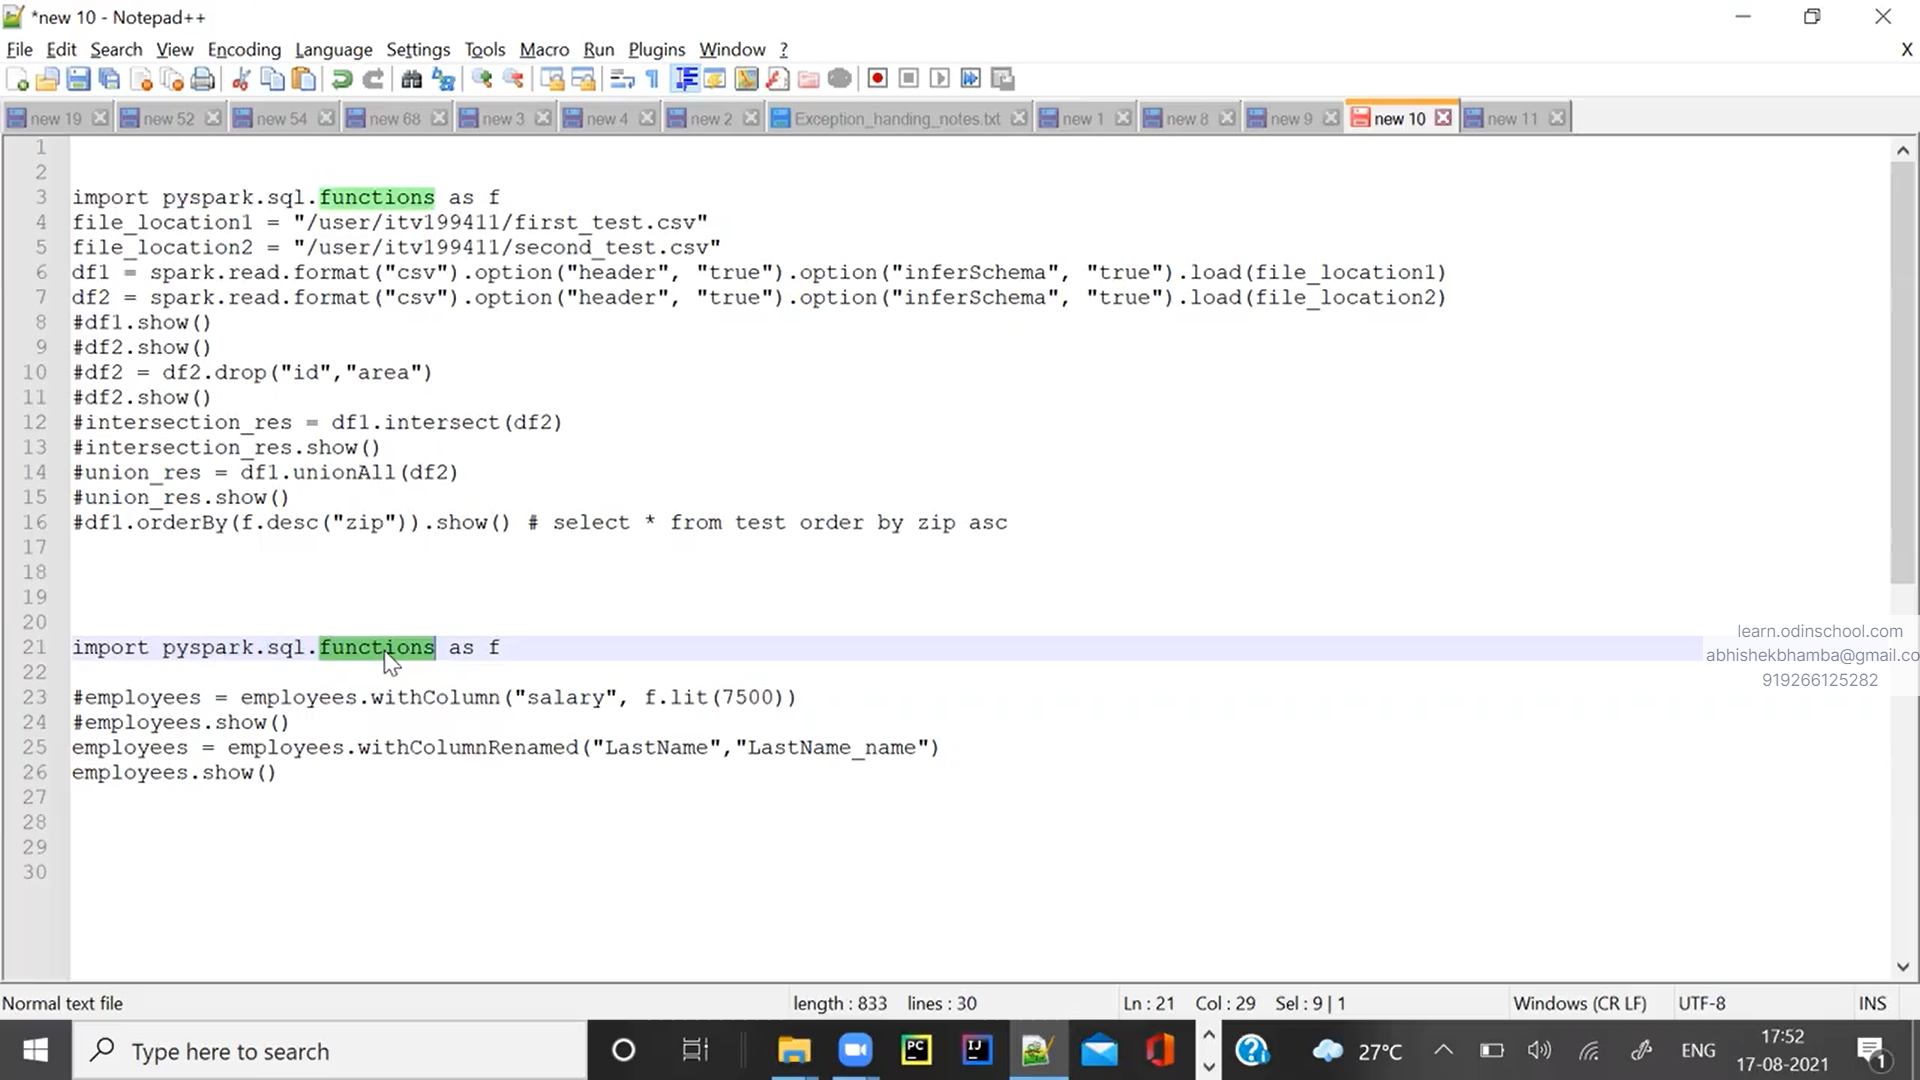

In [ ]:
from IPython.display import Image
Image(filename='/content/Screenshot (1561).png')

# now you can continue from pyspark--> pyspark(5) folder
# img name 1582.